Import necessary files

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

if (os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/EDF') not in sys.path:
    sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/EDF')
if (os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/ECF') not in sys.path:
    sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/ECF')
if (os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/EDDF') not in sys.path:
    sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/EDDF')
if (os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/XML') not in sys.path:
    sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '/XML')

import EDFscheduler
import EDDFscheduler
import ECFscheduler
import schedule_visualizer
from XML_functions import save_xml, save_dep_xml
from data_formats import Task, Dependency


Create demo XMLs similar to the original paper demonstration

In [ ]:
# Same example as of the paper to compare EDDF and ECF
WCETarray = [8, 9, 8, 7, 7, 10]
resources = [0, 0, 0, 1, 1, 1]
deadlines = [45]*6

tasks = []
for i in range(len(WCETarray)):
    tasks.append(Task(i, WCETarray[i], resources[i], deadlines[i]))
save_xml(tasks, 'demo_taskset.xml')

dependencies = [[0, 2], [1, 3], [1, 4], [2, 5], [3, 5], [4, 5]]
deps = []
for i in range(len(dependencies)):
    deps.append(Dependency(dependencies[i][0], dependencies[i][1]))
save_dep_xml(deps, 'demo_dependencies.xml')


Print contents of XMLs

In [ ]:
import xml.dom.minidom

dom = xml.dom.minidom.parse('demo_taskset.xml') # or xml.dom.minidom.parseString(xml_string)
pretty_xml_as_string = dom.toprettyxml()
print("Taskset XML format:\n", pretty_xml_as_string)

dom = xml.dom.minidom.parse('demo_dependencies.xml') # or xml.dom.minidom.parseString(xml_string)
pretty_xml_as_string = dom.toprettyxml()
print("Dependencies XML format:\n", pretty_xml_as_string)

Visualization of the taskset

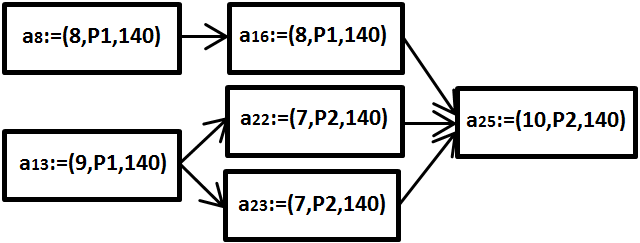

Schedule taskset using EDF

In [ ]:
# EDF scheduler
schedule, makespan, schedulerTime = EDFscheduler.EDF('demo_taskset.xml', 'demo_dependencies.xml')
print("EDF Makespan: ", makespan)
print("EDF scheduling time: ", schedulerTime)
print(schedule)
schedule_visualizer.vizualize(schedule)

Schedule taskset using ECF

In [ ]:
# ECF scheduler
schedule, makespan, CALAPCalculationTime, schedulerTime = ECFscheduler.ECF('demo_taskset.xml', 'demo_dependencies.xml')
print("ECF Makespan: ", makespan)
print("CALAP calculating time: ", CALAPCalculationTime)
print("ECF scheduling time: ", schedulerTime)
print(schedule)
schedule_visualizer.vizualize(schedule)

Schedule taskset using EDDF

In [ ]:
# EDDF scheduler
schedule, makespan, dueDatesCalculationTime, schedulerTime = EDDFscheduler.EDDF('demo_taskset.xml', 'demo_dependencies.xml')
print("EDDF Makespan: ", makespan)
print("Due-Dates calculating time: ", dueDatesCalculationTime)
print("EDDF scheduling time: ", schedulerTime)
print(schedule)
schedule_visualizer.vizualize(schedule)